# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [27]:
n = 7
label_name = "stat3"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [28]:

layers = [16,4,2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [29]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 43.723767042160034
Epoch 1, Loss 43.57989156246185
Epoch 2, Loss 43.52417927980423
Epoch 3, Loss 43.481898069381714
Epoch 4, Loss 43.478238582611084
Epoch 5, Loss 43.528195977211
Epoch 6, Loss 43.41191804409027
Epoch 7, Loss 43.31622576713562
Epoch 8, Loss 43.38938611745834
Epoch 9, Loss 43.29061084985733
Epoch 10, Loss 43.20092576742172
Epoch 11, Loss 43.08474427461624
Epoch 12, Loss 43.08032822608948
Epoch 13, Loss 42.84157782793045
Epoch 14, Loss 42.955030500888824
Epoch 15, Loss 42.68485760688782
Epoch 16, Loss 42.50349402427673
Epoch 17, Loss 42.37694936990738
Epoch 18, Loss 42.161038398742676
Epoch 19, Loss 42.00113880634308
Epoch 20, Loss 41.87924534082413
Epoch 21, Loss 41.62725007534027
Epoch 22, Loss 41.170922100543976
Epoch 23, Loss 40.879019379615784
Epoch 24, Loss 40.47902065515518
Epoch 25, Loss 40.2260120511055
Epoch 26, Loss 39.94448626041412
Epoch 27, Loss 39.230443358421326
Epoch 28, Loss 38.682838916778564
Epoch 29, Loss 38.24978405237198
Epoch 30, Loss

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

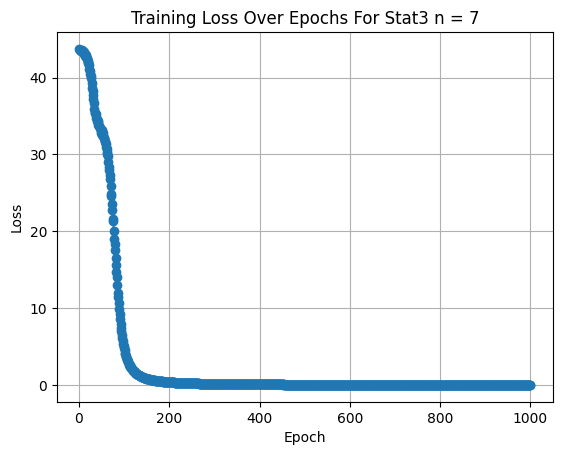

In [30]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs For Stat3 n = 7')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat3_n=7.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

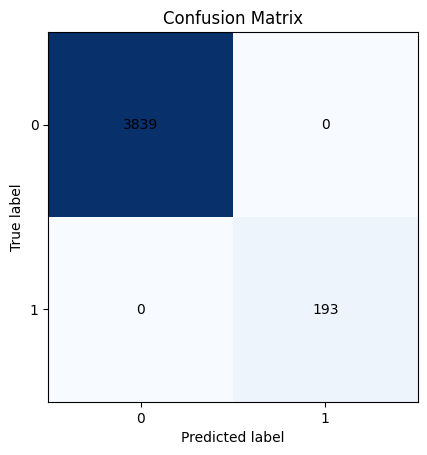

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [31]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

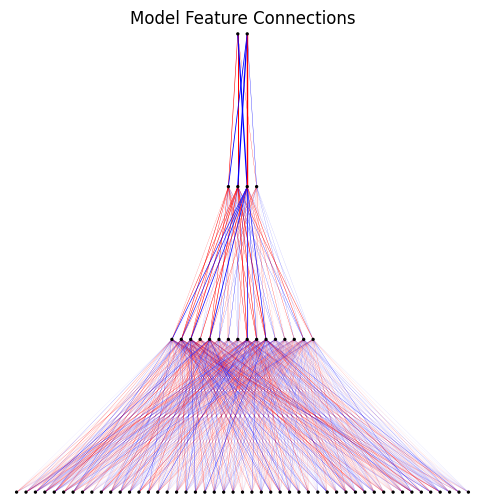

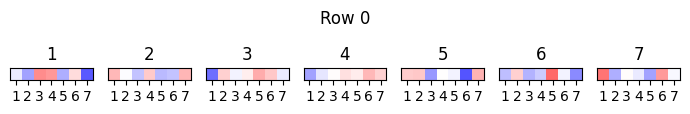

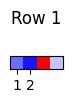

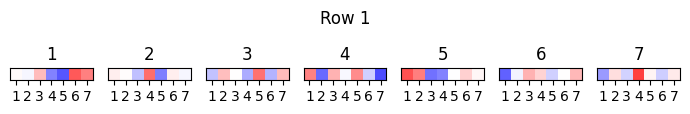

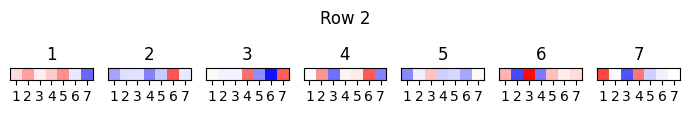

In [32]:



model.plot_connections()

model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(2, 1)
model.plot_heatmap_feature(0,1)
model.plot_heatmap_feature(0,2)


